# Lab time series analysis: golden cross

A *Golden Cross* is the name of a pattern that is used in the technical analysis of stock prices. A Golden Cross occurs when a short-term moving average breaks above a long-term moving average. This is an indicator for the potential of a major rally on the stock (*bull market*). The long-term moving average is then considered to be a "resistance level", i.e. when the stock price drops towards that level, it will often quickly bounce up again.

The dataset `SP500.csv` contains among others the closing price of the Standard & Poors 500, a stock market index tracking the performance of 500 large publicly traded companies in the USA. The data was collected by Hoseinzade & Haratizadeh (2019).

- Import the CSV-file in a DataFrame, parse the `Date` column as a date and set it as the index. We will only use the variable `Close`, so you can drop all other variables.
- Plot the time series to get an idea about the evolution over time of the S&P500 index.

In [1]:
# Package imports for data science and time series analysis in particular
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd;
import scipy.stats as stats;
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
sp500 = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/SP500.csv', parse_dates=['Date']).set_index(['Date'])
sp500 = sp500[['Close']]
sp500.head()

,Close
Date,
2009-12-31,1115.099976
2010-01-04,1132.989990
2010-01-05,1136.520020
2010-01-06,1137.140015
2010-01-07,1141.689941


Traders often use moving averages when analysing the evolution of stock prices. Specifically, the 50-day moving average is the average price over the last 10 trading weeks, making it a commonly used support level. Likewise, the 200-day moving average represents the average price over the past 40 weeks, which is used to suggest a relatively cheap price compared to the price range over most of the past year.

- Calculate the 50- and 200-day moving average and add the result as new columns in the DataFrame with names `MA50` and `MA200`, respectively.

In [3]:
sp500['SMA50'] = sp500['Close'].rolling(50).mean()
sp500['SMA200'] = sp500['Close'].rolling(200).mean()
sp500

,Close,SMA50,SMA200
Date,,,
2009-12-31,1115.099976,NaN,NaN
2010-01-04,1132.989990,NaN,NaN
2010-01-05,1136.520020,NaN,NaN
2010-01-06,1137.140015,NaN,NaN
2010-01-07,1141.689941,NaN,NaN
...,...,...,...
2017-11-09,2584.620117,2533.804614,2432.128003
2017-11-10,2582.300049,2536.017617,2433.566053
2017-11-13,2584.840088,2538.183418,2435.085754


- Plot the S&P500 index with both moving averages


<AxesSubplot:xlabel='Date'>

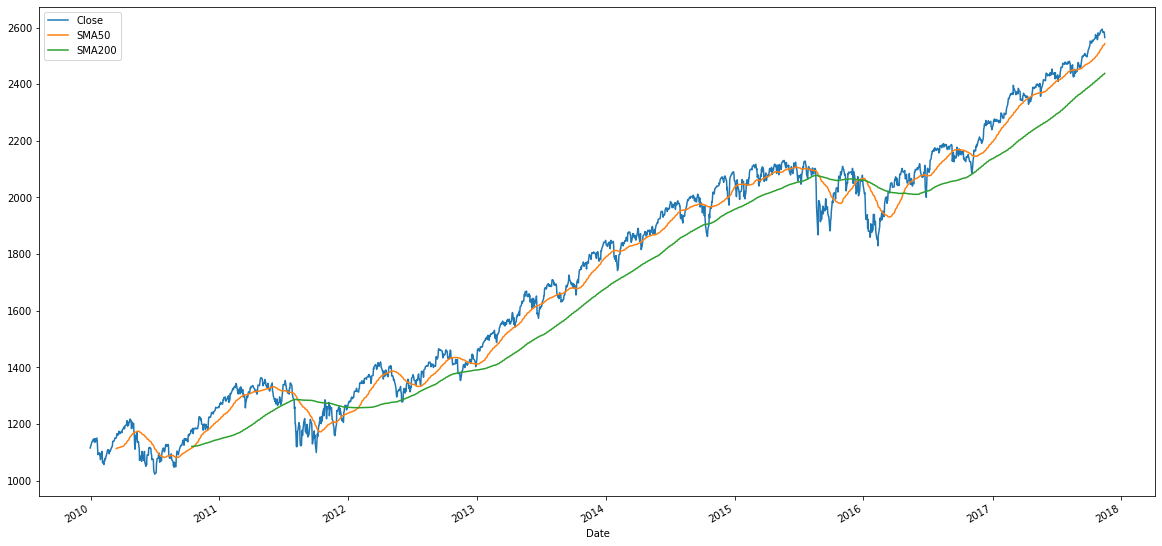

In [4]:
sp500.plot(y=['Close', 'SMA50', 'SMA200'], figsize=(20,10))


- In August 2011, stock markets across the world [saw a sharp drop in stock prices](https://en.wikipedia.org/wiki/August_2011_stock_markets_fall), due to the [European sovereign debt crisis](https://en.wikipedia.org/wiki/European_debt_crisis). Look for that drop in the plot.
- After the 2011 stock markets fall, there are *two* occurrences of a golden cross.
- Both occurrences mark the beginning of long periods with a *bull market* (characterized by rising prices). If possible, identify how long each period lasted, i.e. when does the `MA50` drops below `MA200` again?
- Can you identify occurrences when the `MA200` effectively behaves like a support level?

## References

Hoseinzade, E., & Haratizadeh, S. (2019-09). *CNNpred: CNN-based stock market prediction using a diverse set of variables.* Expert Systems with Applications, **129,** pp. 273–285. https://doi.org/10.1016/j.eswa.2019.03.029